# 1 学习了解nuscenes数据集

- Category：   表示目标的种类，如汽车
- Attribute：  实列属性，表示同一目标不同状态下的属性描述，如一辆汽车的移动与停止
- Visibility:  实例的可见性
- Instance：   表示一个实例对象，如某个汽车
- Sensor:      传感器描述，如某个相机传感器
- Calibrated sensor： 表示传感器的內外参数等信息
- Ego_ pose：  表示某个时间车辆的参态
- Log：        表示提取出数据的日志文件
- Scene：      来自日志文件中一个20s的连续帧
- Sample：     表示每隔0.55采集一次的经过标注的关键帧
- Sample data: 传感器返回的数据，如雷达点云或图片
- Sample_ annotation： 用于标注某个目标在一个sample中方向等信息的三维标注框
- Map:         地图数据

In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

dataroot='./data/nuscenes/mini'
version='v1.0-mini'
nusc = NuScenes(version=version, 
                dataroot=dataroot, 
                verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.378 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


## 1.1 查看数据中的所有场景

In [2]:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

**输出结果**: mini数据集中只包含10个场景，每个场景大约持续20s【有的19s】，即每个场景有20秒采集到的信息。

**打印信息的注解：**
- scene-1100,                                 场景名称
- Night, peds in sidewalk, peds cross cro...  场景的景物描述
- [18-11-21 11:49:47]                         采集时间
- 19s,                                        场景持续时间
- singapore-hollandv,                         场景采集地点
- #anns:935                                   场景标注的数量

## 1.2 查看某个场景中的信息

In [3]:
my_scene = nusc.scene[0]
my_scene

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

**输出结果**：token为唯一标识，通过token可以获取对应信息。

In [4]:
#获取第一个sample的token值
first_sample_token = my_scene['first_sample_token']  
first_sample_token 

'ca9a282c9e77460f8360f564131a8af5'

# 2 顺着LSS逻辑查看训练数据

In [5]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
nusc = NuScenes(version='v1.0-mini', 
                dataroot='./data/nuscenes/mini', 
                verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.291 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


## 2.1 获取一系列样本, 包含了传感器采集到的信息、标注信息等等。

形如：

{'token': 'ca9a282c9e77460f8360f564131a8af5',
  'timestamp': 1532402927647951,
  'prev': '',
  'next': '39586f9d59004284a7114a68825e8eec',
  'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
  'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
           'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
           'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
           'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
           'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
           'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
           'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
           'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
           'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
           'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
           'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
           'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
  'anns': ['ef63a697930c4b20a6b9791f423351da',
           '6b89da9bf1f84fd6a5fbe1c3b236f809',
           ...]},

In [6]:
samples = [samp for samp in nusc.sample]
samples

[{'token': 'ca9a282c9e77460f8360f564131a8af5',
  'timestamp': 1532402927647951,
  'prev': '',
  'next': '39586f9d59004284a7114a68825e8eec',
  'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
  'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
   'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
   'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
   'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
   'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
   'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
   'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
   'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
   'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
   'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
   'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
   'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
  'anns': ['ef63a697930c4b20a6b9791f423351da',
   '6b89da9bf1f84fd6a5fbe1c3b236f809',
   '924ee6ac1fed440a9d9e3720aac635a0',


In [7]:
version = 'v1.0-mini'
is_train = True
split = {
    'v1.0-trainval': {True: 'train', False: 'val'},
    'v1.0-mini': {True: 'mini_train', False: 'mini_val'},
}[version][is_train]
split

'mini_train'

In [8]:
from nuscenes.utils.splits import create_splits_scenes
scenes = create_splits_scenes()[split]
scenes

['scene-0061',
 'scene-0553',
 'scene-0655',
 'scene-0757',
 'scene-0796',
 'scene-1077',
 'scene-1094',
 'scene-1100']

In [9]:
samples = [samp for samp in samples if
        nusc.get('scene', samp['scene_token'])['name'] in scenes]
samples

[{'token': 'ca9a282c9e77460f8360f564131a8af5',
  'timestamp': 1532402927647951,
  'prev': '',
  'next': '39586f9d59004284a7114a68825e8eec',
  'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
  'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
   'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
   'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
   'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
   'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
   'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
   'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
   'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
   'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
   'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
   'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
   'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
  'anns': ['ef63a697930c4b20a6b9791f423351da',
   '6b89da9bf1f84fd6a5fbe1c3b236f809',
   '924ee6ac1fed440a9d9e3720aac635a0',


In [10]:
samples.sort(key=lambda x: (x['scene_token'], x['timestamp']))

## 2.2 减少读取的相机图片，随机选取 ncams 个相机的图片

In [11]:
import numpy as np
cams = ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT',
         'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT']
Ncams = 5
cams = np.random.choice(cams, Ncams, replace=False)
cams

array(['CAM_FRONT', 'CAM_BACK_LEFT', 'CAM_FRONT_LEFT', 'CAM_BACK_RIGHT',
       'CAM_BACK'], dtype='<U15')

## 2.3 依次从每个相机读取数据

1. 读取样本图像

In [12]:
# 假设选择前视 ‘CAM_FRONT_LEFT’
cam = 'CAM_FRONT_LEFT'
rec = samples[45]
samp = nusc.get('sample_data', rec['data'][cam])
samp

{'token': '8e2312a17c8b42d3b16e45134fc0b0a2',
 'sample_token': '2021b6b367984ad7b18464a550d0ae8d',
 'ego_pose_token': '8e2312a17c8b42d3b16e45134fc0b0a2',
 'calibrated_sensor_token': 'f255377bb7044dd787fa75e2723014dd',
 'timestamp': 1535489298004799,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT_LEFT/n008-2018-08-28-16-43-51-0400__CAM_FRONT_LEFT__1535489298004799.jpg',
 'prev': 'edf3fae6eef4487eb6eff7549f260566',
 'next': '68320035e793405396afc2ebc01fc8f4',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT_LEFT'}

(1600, 900)


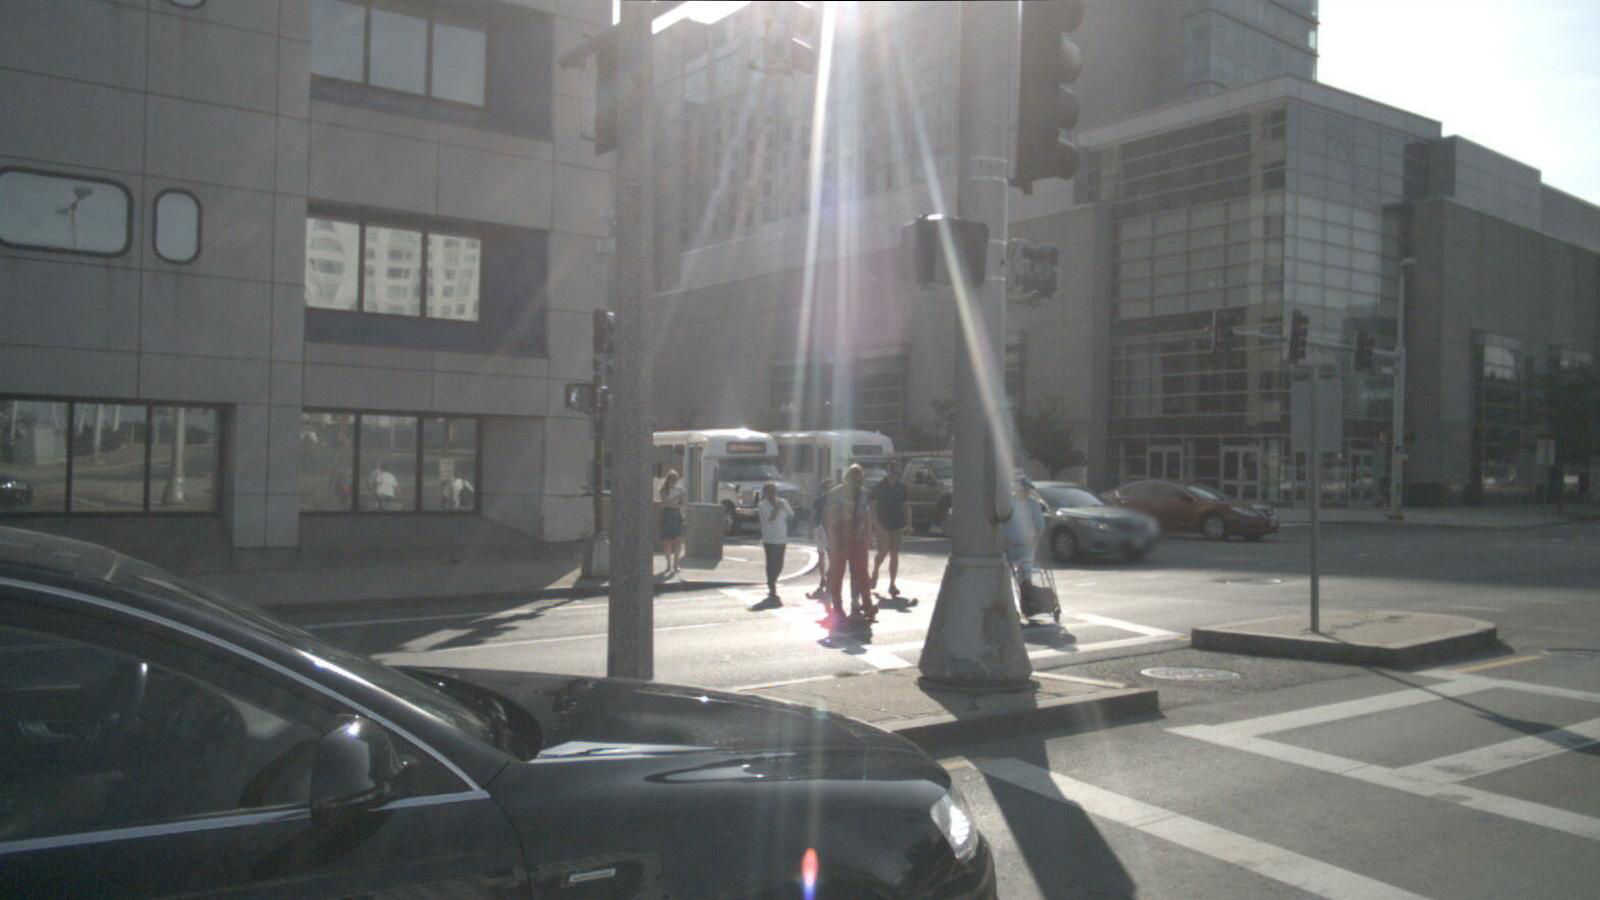

In [13]:
import os
from PIL import Image

dataroot='./data/nuscenes/mini'
imgname = os.path.join(dataroot, samp['filename'])
img = Image.open(imgname)
print(img.size)
img

In [14]:
import torch

post_rot = torch.eye(2)
post_rot

tensor([[1., 0.],
        [0., 1.]])

In [15]:
post_tran = torch.zeros(2)
post_tran

tensor([0., 0.])

2. 读取该样本图片的相关信息，包括相机安装的旋转，平移及相机内参

In [16]:
sens = nusc.get('calibrated_sensor', samp['calibrated_sensor_token'])
sens

{'token': 'f255377bb7044dd787fa75e2723014dd',
 'sensor_token': 'ec4b5d41840a509984f7ec36419d4c09',
 'translation': [1.5752559464, 0.500519383135, 1.50696032589],
 'rotation': [0.6812088525125634,
  -0.6687507165046241,
  0.2101702448905517,
  -0.21108161122114324],
 'camera_intrinsic': [[1257.8625342125129, 0.0, 827.2410631095686],
  [0.0, 1257.8625342125129, 450.915498205774],
  [0.0, 0.0, 1.0]]}

获取与四元数旋转等效的 3x3 旋转矩阵。

In [17]:
from pyquaternion import Quaternion

rot = torch.Tensor(Quaternion(sens['rotation']).rotation_matrix)
rot

tensor([[ 0.8225,  0.0065,  0.5687],
        [-0.5687,  0.0164,  0.8224],
        [-0.0040, -0.9998,  0.0172]])

## 2.4 样本数据增强

In [18]:
H, W = 900, 1600    # 图像的原始尺寸
fH, fW = 128, 352   # 最终需要的尺寸

resize = np.random.uniform(*(0.193, 0.225))
print(resize)
resize_dims = (int(W*resize), int(H*resize))
newW, newH = resize_dims
newW, newH

0.2157562996879526


(345, 194)

In [19]:
bot_pct_lim=(0.0, 0.22)
crop_h = int((1 - np.random.uniform(*bot_pct_lim))*newH) - fH
crop_w = int(np.random.uniform(0, max(0, newW - fW)))
crop_h, crop_w

(34, 0)

In [20]:
crop = (crop_w, crop_h, crop_w + fW, crop_h + fH)
crop

(0, 34, 352, 162)

In [21]:
def get_rot(h):
    return torch.Tensor([
        [np.cos(h), np.sin(h)],
        [-np.sin(h), np.cos(h)],
    ])
crop = (0, 53, 352, 181)
rotate = 4.0
post_rot = torch.eye(2)
post_tran = torch.zeros(2)
post_rot *= resize
post_tran -= torch.Tensor(crop[:2])
print(post_rot, post_tran)
if True:
    A = torch.Tensor([[-1, 0], [0, 1]])
    b = torch.Tensor([crop[2] - crop[0], 0])
    post_rot = A.matmul(post_rot)
    post_tran = A.matmul(post_tran) + b
A = get_rot(rotate/180*np.pi)
b = torch.Tensor([crop[2] - crop[0], crop[3] - crop[1]]) / 2
b = A.matmul(-b) + b
post_rot = A.matmul(post_rot)
post_tran = A.matmul(post_tran) + b
post_rot, post_tran

tensor([[0.2158, 0.0000],
        [0.0000, 0.2158]]) tensor([  0., -53.])


(tensor([[-0.2152,  0.0151],
         [ 0.0151,  0.2152]]),
 tensor([343.4098, -64.9921]))

In [22]:
post_tran2 = torch.zeros(3)
post_rot2 = torch.eye(3)
post_tran2[:2] = post_tran
post_rot2[:2, :2] = post_rot
post_tran2, post_rot2

(tensor([343.4098, -64.9921,   0.0000]),
 tensor([[-0.2152,  0.0151,  0.0000],
         [ 0.0151,  0.2152,  0.0000],
         [ 0.0000,  0.0000,  1.0000]]))

## 2.5 获取target 

1. 读取顶部激光雷达数据

In [23]:
nusc.get('sample_data', rec['data']['LIDAR_TOP'])

{'token': '2b2d98f0daec4fdeb6716d1f6b546a5c',
 'sample_token': '2021b6b367984ad7b18464a550d0ae8d',
 'ego_pose_token': '2b2d98f0daec4fdeb6716d1f6b546a5c',
 'calibrated_sensor_token': '1dd23defeb98488e851a108a6bdae770',
 'timestamp': 1535489298047428,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n008-2018-08-28-16-43-51-0400__LIDAR_TOP__1535489298047428.pcd.bin',
 'prev': '50d989121771495e9937fbd40bae1b8c',
 'next': 'a99220de2baa4d3cb763057c273ac180',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

2. 读取车辆姿态数据

In [24]:
# 在 def get_binimg() 中
egopose = nusc.get('ego_pose', 
                   nusc.get('sample_data', 
                   rec['data']['LIDAR_TOP'])['ego_pose_token'])
egopose

{'token': '2b2d98f0daec4fdeb6716d1f6b546a5c',
 'timestamp': 1535489298047428,
 'rotation': [0.3559189826878399,
  0.0018057365272423622,
  -0.009148368803714158,
  0.934470290820569],
 'translation': [1316.378185650685, 1038.5936853755643, 0.0]}

In [25]:
trans = -np.array(egopose['translation'])
rot = Quaternion(egopose['rotation']).inverse
trans, rot

(array([-1316.37818565, -1038.59368538,    -0.        ]),
 Quaternion(0.35591898268783984, -0.0018057365272423618, 0.009148368803714156, -0.9344702908205688))

In [26]:
def gen_dx_bx(xbound, ybound, zbound):
    dx = torch.Tensor([row[2] for row in [xbound, ybound, zbound]])
    bx = torch.Tensor([row[0] + row[2]/2.0 for row in [xbound, ybound, zbound]])
    nx = torch.LongTensor([(row[1] - row[0]) / row[2] for row in [xbound, ybound, zbound]])

    return dx, bx, nx


xbound=[-50.0, 50.0, 0.5]
ybound=[-50.0, 50.0, 0.5]
zbound=[-10.0, 10.0, 20.0]
dbound=[4.0, 45.0, 1.0]

dx, bx, nx = gen_dx_bx(xbound, ybound, zbound)
dx, bx, nx = dx.numpy(), bx.numpy(), nx.numpy()
dx, bx, nx

/tmp/ipykernel_7573/1660538541.py:4: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  nx = torch.LongTensor([(row[1] - row[0]) / row[2] for row in [xbound, ybound, zbound]])


(array([ 0.5,  0.5, 20. ], dtype=float32),
 array([-49.75, -49.75,   0.  ], dtype=float32),
 array([200, 200,   1]))

In [27]:
img = np.zeros((nx[0], nx[1]))
print(img.shape)
img

(200, 200)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

3. 读取样本的标注信息

In [28]:
rec['anns']

['f5f9b9db580d412083fd18ee4fda0b8e',
 'def668db4fb042999181df130d39d784',
 '6707fb3745614cb6a865000c644887eb',
 '95addac7887842bfac82a2ecc1754f48',
 '5043e6aeeda340388e4be6ef808f0236',
 'a1ce2542458b4f9cb65cda2e5f2d8cc6',
 'bdf12e3993614f229022737f10485671',
 '5eb01681e67a4fbbb6feade1a083160c',
 '6c7546c907ce408fab6a357b2f1832af',
 '05871fe688cf482d8c455be79259d4c4',
 'e41821725ea043acb79225b106feaccb',
 '3f8f466ce3b2433b95271f4315192316',
 'b6e3115d947b4c52867ba7dfa4c62775',
 '5ae5ac0313504857a891a74e24681b2a',
 'ff5c62ee33cc4445b7766526c6b9b4a8',
 'b43d6d6cec0d440d86736d46bda47d5f',
 'ed79219f49fb4ef2804c23043018ebdc',
 '76108406fd72450e85087da818dc25db',
 '29724345dcd24e39a3e23e4004c85645',
 '11fbd0c092f14d1aab729113a6b010a2',
 '72602729f5514dccbe10b2f739e0baf0',
 'f8de8675c8a74eeaae2a0353da8364af',
 '47c27f6e3cb84291beec3ea1940817af',
 'fe230f784b024d16b95e998cd4d985d0',
 '1cefb03fa06c4c748aafec078a251c5f',
 'e3c8afab5b8648f6a8c399e3f5c0a90f',
 '9b01060e9f4c4ead97f3af66f31fad74',
 

In [29]:
inst = nusc.get('sample_annotation', rec['anns'][0])
inst

{'token': 'f5f9b9db580d412083fd18ee4fda0b8e',
 'sample_token': '2021b6b367984ad7b18464a550d0ae8d',
 'instance_token': '19804c352c0a4767b61b8d0709d1db99',
 'visibility_token': '4',
 'attribute_tokens': ['ab83627ff28b465b85c427162dec722f'],
 'translation': [1294.421, 1031.646, 0.507],
 'size': [0.552, 0.918, 1.739],
 'rotation': [0.9380281279379362, 0.0, 0.0, 0.3465591308813702],
 'prev': '70885047ed1c4e90924bf304c830501b',
 'next': 'd3ba83018b4c45b0b3523bab752b08c3',
 'num_lidar_pts': 0,
 'num_radar_pts': 0,
 'category_name': 'human.pedestrian.adult'}

可视化标注信息

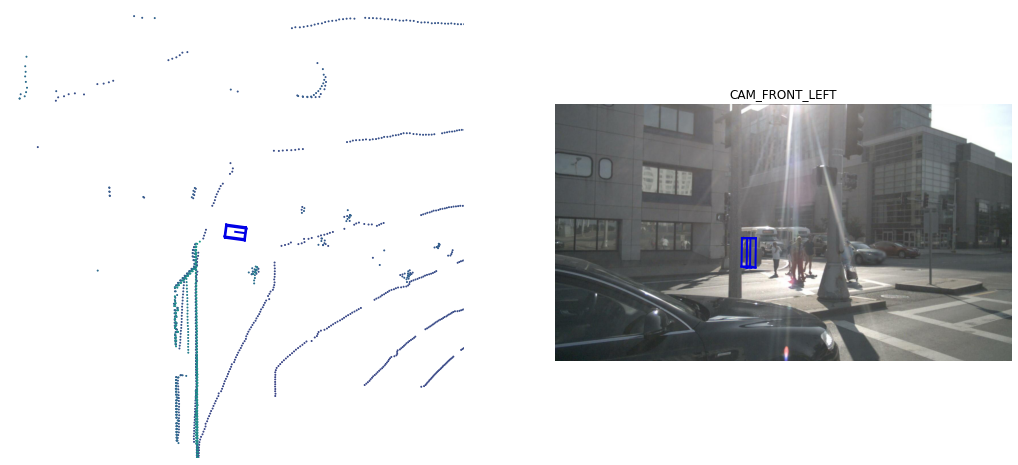

In [30]:
nusc.render_annotation(inst['token'])

In [31]:
from nuscenes.utils.data_classes import Box

box = Box(inst['translation'], inst['size'], Quaternion(inst['rotation']))
box

label: nan, score: nan, xyz: [1294.42, 1031.65, 0.51], wlh: [0.55, 0.92, 1.74], rot axis: [0.00, 0.00, 1.00], ang(degrees): 40.55, ang(rad): 0.71, vel: nan, nan, nan, name: None, token: None

In [32]:
box.translate(trans)
box

label: nan, score: nan, xyz: [-21.96, -6.95, 0.51], wlh: [0.55, 0.92, 1.74], rot axis: [0.00, 0.00, 1.00], ang(degrees): 40.55, ang(rad): 0.71, vel: nan, nan, nan, name: None, token: None

In [33]:
box.rotate(rot)
box

label: nan, score: nan, xyz: [11.78, 19.78, 0.70], wlh: [0.55, 0.92, 1.74], rot axis: [0.00, 0.01, -1.00], ang(degrees): 97.75, ang(rad): 1.71, vel: nan, nan, nan, name: None, token: None

In [34]:
pts = box.bottom_corners()[:2].T
pts

array([[11.43379624, 19.38087484],
       [11.98072875, 19.30654123],
       [12.10450041, 20.21606385],
       [11.5575679 , 20.29039745]])

In [35]:
pts = np.round((pts - bx[:2] + dx[:2]/2.) / dx[:2]
                ).astype(np.int32)
pts

array([[123, 139],
       [124, 139],
       [124, 140],
       [123, 141]], dtype=int32)

In [36]:
import cv2

pts[:, [1, 0]] = pts[:, [0, 1]]
cv2.fillPoly(img, [pts], 1.0)
print(img.shape)
img

(200, 200)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
cv2.imshow('box', img)
cv2.waitKey()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55c92d36edd0) is not the object's thread (0x55c92cedf260).
Cannot move to target thread (0x55c92d36edd0)

Qt: Session management error: None of the authentication protocols specified are supported
QObject::moveToThread: Current thread (0x55c92d36edd0) is not the object's thread (0x55c92cedf260).
Cannot move to target thread (0x55c92d36edd0)

QObject::moveToThread: Current thread (0x55c92d36edd0) is not the object's thread (0x55c92cedf260).
Cannot move to target thread (0x55c92d36edd0)

QObject::moveToThread: Current thread (0x55c92d36edd0) is not the object's thread (0x55c92cedf260).
Cannot move to target thread (0x55c92d36edd0)

QObject::moveToThread: Current thread (0x55c92d36edd0) is not the object's thread (0x55c92cedf260).
Cannot move to target thread (0x55c92d36edd0)

QObject::moveToThread: Current thread (0x55c92d36edd0) is not the object's thread (0x55c92cedf260).
Cannot move to target thread (0x55c92d36edd0)

QObject::moveToThread: Curr

## 2.6 采用VizData加载数据

**多了一个get_lidar_data()**

In [38]:
sample_rec = rec
nsweeps = 3
min_distance = 2.2


# 初始化返回值
points = np.zeros((5, 0))
points

array([], shape=(5, 0), dtype=float64)

In [39]:
ref_sd_token = sample_rec['data']['LIDAR_TOP']
ref_sd_token

'2b2d98f0daec4fdeb6716d1f6b546a5c'

1. 读取顶部激光雷达数据

In [40]:
ref_sd_rec = nusc.get('sample_data', ref_sd_token)
ref_sd_rec

{'token': '2b2d98f0daec4fdeb6716d1f6b546a5c',
 'sample_token': '2021b6b367984ad7b18464a550d0ae8d',
 'ego_pose_token': '2b2d98f0daec4fdeb6716d1f6b546a5c',
 'calibrated_sensor_token': '1dd23defeb98488e851a108a6bdae770',
 'timestamp': 1535489298047428,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/LIDAR_TOP/n008-2018-08-28-16-43-51-0400__LIDAR_TOP__1535489298047428.pcd.bin',
 'prev': '50d989121771495e9937fbd40bae1b8c',
 'next': 'a99220de2baa4d3cb763057c273ac180',
 'sensor_modality': 'lidar',
 'channel': 'LIDAR_TOP'}

2. 获取车辆姿态数据

In [41]:
ref_pose_rec = nusc.get('ego_pose', ref_sd_rec['ego_pose_token'])
ref_pose_rec

{'token': '2b2d98f0daec4fdeb6716d1f6b546a5c',
 'timestamp': 1535489298047428,
 'rotation': [0.3559189826878399,
  0.0018057365272423622,
  -0.009148368803714158,
  0.934470290820569],
 'translation': [1316.378185650685, 1038.5936853755643, 0.0]}

3. 获取雷达传感器内外参数

In [42]:
ref_cs_rec = nusc.get('calibrated_sensor', ref_sd_rec['calibrated_sensor_token'])
ref_cs_rec

{'token': '1dd23defeb98488e851a108a6bdae770',
 'sensor_token': 'dc8b396651c05aedbb9cdaae573bb567',
 'translation': [0.985793, 0.0, 1.84019],
 'rotation': [0.706749235646644,
  -0.015300993788500868,
  0.01739745181256607,
  -0.7070846669051719],
 'camera_intrinsic': []}

In [43]:
ref_time = 1e-6 * ref_sd_rec['timestamp']
ref_time

1535489298.047428

4. 将位姿转换为变换矩阵。

transform_matrix():
 :param translation：<np.float32: 3>。 x、y、z 中的平移。
 :param rotation：四元数的旋转（w ri rj rk）。
 :param inverse：是否计算逆变换矩阵。
 :return: <np.float32: 4, 4>。 变换矩阵。


In [44]:
from nuscenes.utils.geometry_utils import transform_matrix

car_from_global = transform_matrix(ref_pose_rec['translation'], 
                                   Quaternion(ref_pose_rec['rotation']),
                                   inverse=True)
car_from_global

array([[-7.46636834e-01,  6.65158391e-01,  9.88697051e-03,
         2.92027136e+02],
       [-6.65224470e-01, -7.46475970e-01, -1.58123659e-02,
         1.65097221e+03],
       [-3.13734196e-03, -1.83831495e-02,  9.99826093e-01,
         2.32225515e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

5. 集成当前和以前的sweeps    nsweeps：先前的帧数

In [45]:
sample_data_token = sample_rec['data']['LIDAR_TOP']
current_sd_rec = nusc.get('sample_data', sample_data_token)
sample_data_token, current_sd_rec

('2b2d98f0daec4fdeb6716d1f6b546a5c',
 {'token': '2b2d98f0daec4fdeb6716d1f6b546a5c',
  'sample_token': '2021b6b367984ad7b18464a550d0ae8d',
  'ego_pose_token': '2b2d98f0daec4fdeb6716d1f6b546a5c',
  'calibrated_sensor_token': '1dd23defeb98488e851a108a6bdae770',
  'timestamp': 1535489298047428,
  'fileformat': 'pcd',
  'is_key_frame': True,
  'height': 0,
  'width': 0,
  'filename': 'samples/LIDAR_TOP/n008-2018-08-28-16-43-51-0400__LIDAR_TOP__1535489298047428.pcd.bin',
  'prev': '50d989121771495e9937fbd40bae1b8c',
  'next': 'a99220de2baa4d3cb763057c273ac180',
  'sensor_modality': 'lidar',
  'channel': 'LIDAR_TOP'})

6. 依次集成先前的每一帧

In [46]:
from nuscenes.utils.data_classes import LidarPointCloud

"""
LidarPointCloud.from_file():
从二进制 numpy 格式加载 LIDAR 数据。 数据存储为（x，y，z，强度，环索引）。
    :param file_name：磁盘上点云文件的路径。
    :return: LidarPointCloud 实例（x，y，z，强度）。
    
    
current_pc.remove_close():
删除距离原点在一定半径内太近的点。
     :param radius：删除点以下的半径。
"""
# 加载点云并移除靠近传感器的点。
current_pc = LidarPointCloud.from_file(os.path.join(nusc.dataroot, current_sd_rec['filename']))
current_pc.remove_close(min_distance)
current_pc

In [47]:
current_pose_rec = nusc.get('ego_pose', current_sd_rec['ego_pose_token'])
global_from_car = transform_matrix(current_pose_rec['translation'],
                                   Quaternion(current_pose_rec['rotation']), 
                                   inverse=False)

后续内容差不多

# 查看data/nuscenes/mini/maps/expansion数据

针对疑问：模型生成的是2D 单通道的图片，是如何成为彩色的BEV图像？

In [49]:
from nuscenes.map_expansion.map_api import NuScenesMap

def get_nusc_maps(map_folder):
    nusc_maps = {map_name: NuScenesMap(dataroot=map_folder,
                map_name=map_name) for map_name in [
                    "singapore-hollandvillage", 
                    "singapore-queenstown",
                    "boston-seaport",
                    "singapore-onenorth",
                ]}
    return nusc_maps


map_folder = "./data/nuscenes/mini"

nusc_maps = get_nusc_maps(map_folder)   # 获取地图数据
nusc_maps

{'singapore-hollandvillage': <nuscenes.map_expansion.map_api.NuScenesMap at 0x7fc23bef1f40>,
 'singapore-queenstown': <nuscenes.map_expansion.map_api.NuScenesMap at 0x7fc23bef18b0>,
 'boston-seaport': <nuscenes.map_expansion.map_api.NuScenesMap at 0x7fc30d867070>,
 'singapore-onenorth': <nuscenes.map_expansion.map_api.NuScenesMap at 0x7fc30d867670>}

### 找到当前数据所在的城市

**rec 的结构**

```shell
{'token': 'cc8c0bf57f984915a77078b10eb33198', 
'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2', 
'nbr_samples': 39, 
'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5', 
'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0', 
'name': 'scene-0061', 
'description': 'Parked truck, construction, intersection, turn left, following a van'}
```

In [54]:
# log = nusc.get('log', rec['log_token'])
log = nusc.get('log', '7e25a2c8ea1f41c5b0da1e69ecfa71a2')
log

{'token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'logfile': 'n015-2018-07-24-11-22-45+0800',
 'vehicle': 'n015',
 'date_captured': '2018-07-24',
 'location': 'singapore-onenorth',
 'map_token': '53992ee3023e5494b90c316c183be829'}

### 储存场景对应的地图数据

In [60]:
scene2map = {}
# scene2map[rec['name']] = log['location']
scene2map['scene-0061'] = log['location']

In [63]:
def plot_nusc_map(rec, nusc_maps, nusc, scene2map, dx, bx):
    egopose = nusc.get('ego_pose', nusc.get('sample_data', rec['data']['LIDAR_TOP'])['ego_pose_token'])
    map_name = scene2map[nusc.get('scene', rec['scene_token'])['name']]

    rot = Quaternion(egopose['rotation']).rotation_matrix
    rot = np.arctan2(rot[1, 0], rot[0, 0])
    center = np.array([egopose['translation'][0], egopose['translation'][1], np.cos(rot), np.sin(rot)])

    poly_names = ['road_segment', 'lane']
    line_names = ['road_divider', 'lane_divider']
    lmap = get_local_map(nusc_maps[map_name], center,
                         50.0, poly_names, line_names)
    for name in poly_names:
        for la in lmap[name]:
            pts = (la - bx) / dx
            plt.fill(pts[:, 1], pts[:, 0], c=(1.00, 0.50, 0.31), alpha=0.2)
    for la in lmap['road_divider']:
        pts = (la - bx) / dx
        plt.plot(pts[:, 1], pts[:, 0], c=(0.0, 0.0, 1.0), alpha=0.5)
    for la in lmap['lane_divider']:
        pts = (la - bx) / dx
        plt.plot(pts[:, 1], pts[:, 0], c=(159./255., 0.0, 1.0), alpha=0.5)

        
def get_local_map(nmap, center, stretch, layer_names, line_names):
    # need to get the map here...
    box_coords = (
        center[0] - stretch,
        center[1] - stretch,
        center[0] + stretch,
        center[1] + stretch,
    )

    polys = {}

    # polygons
    records_in_patch = nmap.get_records_in_patch(box_coords,
                                                 layer_names=layer_names,
                                                 mode='intersect')
    for layer_name in layer_names:
        polys[layer_name] = []
        for token in records_in_patch[layer_name]:
            poly_record = nmap.get(layer_name, token)
            if layer_name == 'drivable_area':
                polygon_tokens = poly_record['polygon_tokens']
            else:
                polygon_tokens = [poly_record['polygon_token']]

            for polygon_token in polygon_tokens:
                polygon = nmap.extract_polygon(polygon_token)
                polys[layer_name].append(np.array(polygon.exterior.xy).T)

    # lines
    for layer_name in line_names:
        polys[layer_name] = []
        for record in getattr(nmap, layer_name):
            token = record['token']

            line = nmap.extract_line(record['line_token'])
            if line.is_empty:  # Skip lines without nodes
                continue
            xs, ys = line.xy

            polys[layer_name].append(
                np.array([xs, ys]).T
                )

    # convert to local coordinates in place
    rot = get_rot(np.arctan2(center[3], center[2])).T
    for layer_name in polys:
        for rowi in range(len(polys[layer_name])):
            polys[layer_name][rowi] -= center[:2]
            polys[layer_name][rowi] = np.dot(polys[layer_name][rowi], rot)

    return polys

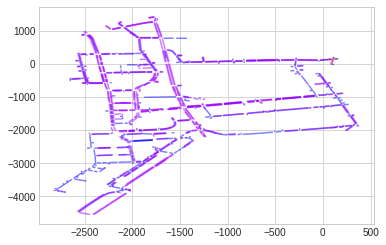

In [67]:
import matplotlib.pyplot as plt

rec = samples[23]
scene2map = {'scene-0061': 'singapore-onenorth', 
             'scene-0103': 'boston-seaport', 
             'scene-0553': 'boston-seaport', 
             'scene-0655': 'boston-seaport', 
             'scene-0757': 'boston-seaport', 
             'scene-0796': 'singapore-queenstown', 
             'scene-0916': 'singapore-queenstown', 
             'scene-1077': 'singapore-hollandvillage', 
             'scene-1094': 'singapore-hollandvillage', 
             'scene-1100': 'singapore-hollandvillage'}
dx, bx = dx[:2], bx[:2]
plot_nusc_map(rec, nusc_maps, nusc, scene2map, dx, bx)